# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [48]:
# Initial imports
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amany\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [6]:
newsapi = NewsApiClient(api_key=api_key)# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article

bitcoin_headlines["articles"][0]


Total articles about bitcoin: 7986


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Gian M. Volpicelli',
 'title': 'The Rise and Fall of a Bitcoin Mining Sensation',
 'description': 'Compass Mining grew quickly during crypto’s halcyon days. Now, its customers and their thousands of mining machines are stuck.',
 'url': 'https://www.wired.com/story/compass-mining-bitcoin-russia/',
 'urlToImage': 'https://media.wired.com/photos/62e9c5e1d7368105da057de3/191:100/w_1280,c_limit/BitRiver-Mining-Center-Rise-And-Fall-Of-Bitcoin-Mining-Business-1184520941.jpg',
 'publishedAt': '2022-08-03T11:00:00Z',
 'content': "It was 8:45 in the morning of June 13 when Bill Stewart, the CEO of Maine-based bitcoin mining business Dynamics Mining, received a call from one of his employees. He's like, Every machine inside of … [+3472 chars]"}

In [16]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about ethereum: {eth_headlines['totalResults']}")

# Show sample article

eth_headlines["articles"][0]


Total articles about ethereum: 4193


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Igor Bonifacic',
 'title': 'GameStop is letting someone sell an NFT that references a 9/11 photo',
 'description': 'Less than two weeks into its soft launch, GameStop’s NFT marketplace is already courting controversy. Among the NFTs listed on the platform is an artwork called “Falling Man” that was spotted by \r\nWeb3 is Going Great\r\n. There’s no mistaking it, the NFT refere…',
 'url': 'https://www.engadget.com/gamestop-falling-man-nft-181910264.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-07/33de5a60-0ab2-11ed-af5f-1167c8493d13',
 'publishedAt': '2022-07-23T18:19:10Z',
 'content': 'Less than two weeks into its soft launch, GameStops NFT marketplace is already courting controversy. Among the NFTs listed on the platform is an artwork called Falling Man that was spotted by \r\nWeb3 … [+1429 chars]'}

In [20]:
# Create the sentiment scores DataFrame given a dict of news articles from the newsapi
def sent_analysis(headlines):
    output_sentiments = []

    for article in headlines["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            output_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            
            })
        
        except AttributeError:
            pass
    
    # Create DataFrame
    df = pd.DataFrame(output_sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df

In [21]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_df = sent_analysis(bitcoin_headlines)

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-08-03,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.119,0.000,0.881
1,2022-08-02,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,0.000,1.000
2,2022-07-12,Miners voluntarily powered down as energy dema...,0.1531,0.057,0.041,0.902
3,2022-07-25,You gotta hand it to some people for being imp...,0.5994,0.130,0.034,0.835
4,2022-07-16,People in Russia will soon no longer be allowe...,0.0516,0.088,0.057,0.855


In [22]:
# Create the Ethereum sentiment scores DataFrame
eth_df = sent_analysis(eth_headlines)

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-07-23,"Less than two weeks into its soft launch, Game...",-0.1531,0.000,0.045,0.955
1,2022-08-02,"It's a day of the week ending in the letter ""y...",-0.2732,0.059,0.115,0.827
2,2022-07-06,Axie Infinity was the prime example of crypto ...,0.2263,0.077,0.000,0.923
3,2022-07-25,"The Ethereum Merge is significant, and not jus...",0.2023,0.048,0.000,0.952
4,2022-07-11,Ethereum and Bitcoin have nearly become househ...,0.2500,0.065,0.000,0.935


In [23]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.082528,0.067360,0.046650,0.885970
std,0.432667,0.064107,0.065877,0.081768
min,-0.862500,0.000000,0.000000,0.641000
25%,-0.225725,0.000000,0.000000,0.837250
50%,0.077150,0.061500,0.000000,0.892500
75%,0.383550,0.118250,0.087000,0.941000
max,0.888500,0.271000,0.249000,1.000000


In [24]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.164641,0.083930,0.047450,0.868610
std,0.435418,0.074651,0.066762,0.092988
min,-0.936600,0.000000,0.000000,0.633000
25%,-0.050650,0.000000,0.000000,0.816250
50%,0.208350,0.070500,0.000000,0.888500
75%,0.510600,0.129750,0.085250,0.934250
max,0.921600,0.299000,0.354000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [26]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'week', 'also', 'char', 'ha' }

In [31]:
# Complete the tokenizer function
def tokenizer(text):
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
      
    return tokens

In [39]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]

In [41]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]

In [51]:
eth_df['tokens']

0     [less, two, soft, launch, gamestops, nft, mark...
1     [day, ending, letter, inevitably, mean, news, ...
2     [axie, infinity, wa, prime, example, crypto, g...
3     [ethereum, merge, significant, people, crypto,...
4     [ethereum, bitcoin, nearly, become, household,...
                            ...                        
95    [new, consumer, dan, frommera, publication, pe...
96    [value, ethereumeth, ha, climbed, past, news, ...
97    [known, merge, ethereumeth, upgrade, transitio...
98    [happenedshares, several, cryptocurrencies, fe...
99    [right, ethereumeth, getting, lot, attention, ...
Name: tokens, Length: 100, dtype: object

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
from collections import Counter
from nltk import ngrams

AttributeError: 'list' object has no attribute 'items'

In [105]:
# Generate the Bitcoin N-grams where N=2
processed_corpus_btc = []
for tokens in bitcoin_df['tokens']:
    processed_corpus_btc = processed_corpus_btc + tokens
            
bigram_btc = ngrams(processed_corpus_btc, n=2)
#print(dict(bigram_btc))

TypeError: sequence item 0: expected str instance, list found

In [95]:
# Generate the Ethereum N-grams where N=2
processed_corpus_eth = []
for tokens in eth_df['tokens']:
    processed_corpus_eth = processed_corpus_eth + tokens
             
bigram_eth = ngrams(processed_corpus_eth, n=2)

#print(dict(bigram_eth))

In [96]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [97]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10= token_count(processed_corpus_btc, 10)
print(btc_top10)

[('char', 99), ('bitcoin', 46), ('ha', 27), ('reuters', 27), ('cryptocurrency', 25), ('crypto', 23), ('july', 22), ('digital', 16), ('wa', 13), ('money', 12)]


In [98]:
# Use token_count to get the top 10 words for Ethereum
eth_top10= token_count(processed_corpus_eth, 10)
print(eth_top10)

[('char', 97), ('crypto', 32), ('ha', 28), ('cryptocurrency', 20), ('nft', 16), ('ethereum', 16), ('market', 16), ('one', 14), ('year', 13), ('investor', 13)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

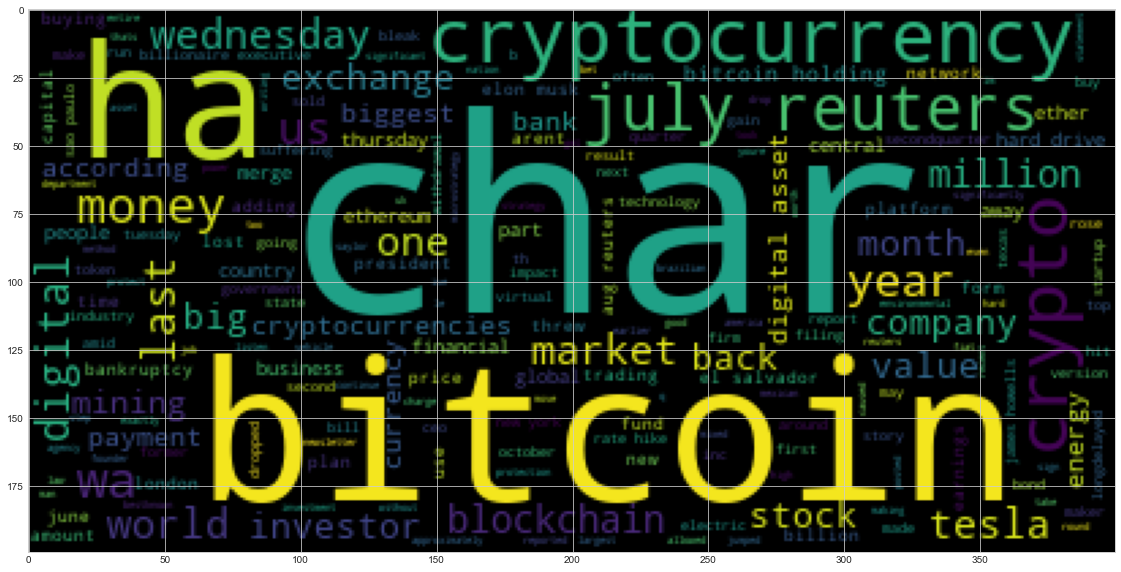

In [101]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(processed_corpus_btc))
plt.imshow(wc)

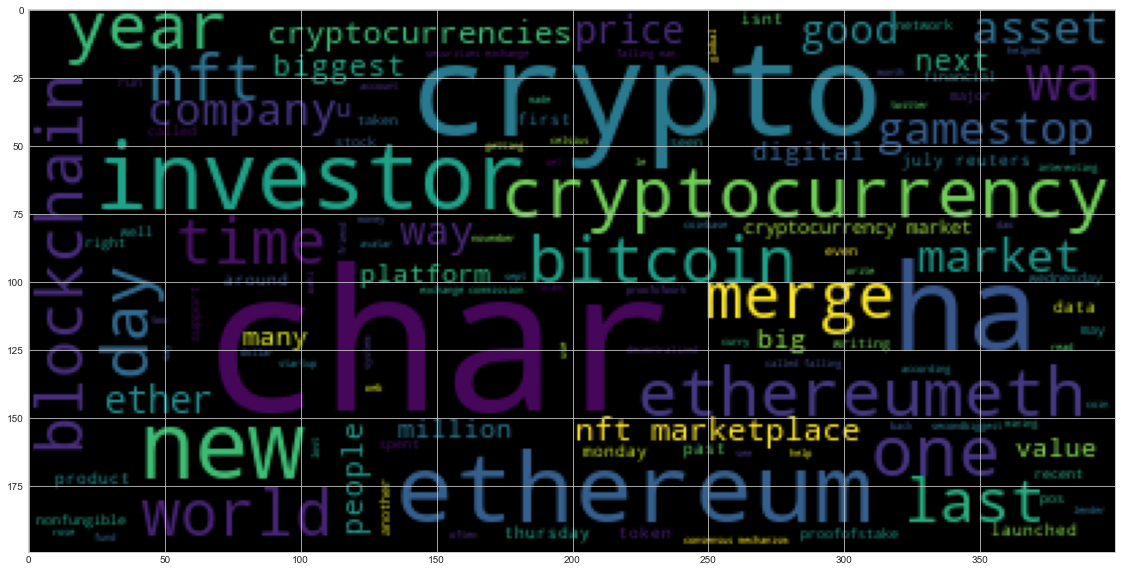

In [102]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(processed_corpus_eth))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [106]:
import spacy
from spacy import displacy

In [107]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm
   

In [108]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [119]:
#function to process NER
def process_NER(df, name):
    # Concatenate all of the Bitcoin text together
    coprus = ' '.join(df['text'])
    # Run the NER processor on all of the text
    tokens = nlp(coprus)

    # Add a title to the document
    tokens.user_data["title"] = f"{name} NER"
    # Render the visualization
    displacy.render(tokens, style='ent')
    # List all Entities
    print([ent.text for ent in tokens.ents])
    return

---
### Bitcoin NER

In [120]:
process_NER(bitcoin_df,'Bitcoin')

['8:45 in the morning of June 13', 'Bill Stewart', 'Maine', 'Dynamics Mining', 'the last several years', 'millions', 'the Whinstone US Bitcoin', 'Rockdale', 'Texas', 'October 9th, 2021', 'North Ameri', 'UK', 'mans', 'Russia', 'Russian', 'Vladimir Putin', 'Tesla', 'Bitcoin', 'Q2', 'the weeks', 'Krist', 'Reuters', '6.85%', '22,717.05', '22:05', 'GMT', 'Wednesday', '1,457.27', '29.1%', '2021', 'Tesla', '$936 million', 'the second quarter of 2022', 'Bitcoin', '75', 'Reuters', 'a good month', 'months', 'more than 17%', 'July', 'October', 'July 30', 'Reuters', '3.36%', '24,584.24', 'GMT', 'Saturday', '798.93', '39.7%', 'the year', '2022', 'Wednesday', '$2.3 billion', 'second-quarter', 'a record $3.3 billion', 'first', 'Reuters', 'winter', 'two', 'Reuters', 'months', 'NEW YORK', 'July 20', 'Reuters', 'Wednesday', 'Tesla Inc', 'TSLA.O', 'about 75%', 'fiat', 'El Salvador', 'Nayib Bukele', 'Bitcoin', 'more than 50 percent', 'this year', 'ten', 'Wednesday', 'approximately 75%', 'Democrats', 'the 

---

### Ethereum NER

In [121]:
process_NER(eth_df,'Ethereum')

['Less than two weeks', 'GameStops', 'Falling Man', 'The Securities and Exchange Commission', '11', 'last year', 'up to 2.7 million', 'daily', 'last November', 'The Ethereum Merge', '2014', 'Merge', 'second', 'the Ethereum Merge', '2014', 'Merge', 'second', 'Ethereum', 'Vitalik Buterin', 'Thursday', 'the Ethereum Community Conference', 'Paris', '4,800', 'April', 'Ethereum Merge', 'Vivaldi', 'Jon von Tetzchner', '+3393', 'the last month', 'Ethereum 2.0', 'second', 'DeFi', 'the "wild west', 'the first six months of 2022', 'the first half of this', 'July 30', 'Reuters', '3.36%', '24,584.24', 'GMT', 'Saturday', '798.93', '39.7%', 'the year', 'Reuters', '6.85%', '22,717.05', '22:05', 'GMT', 'Wednesday', '1,457.27', '29.1%', '80%', 'the past few hours', 'NIRV', 'U.S.', '8 cents', 'CoinGecko', 'NFT', 'Monday', 'Ethereum', 'Stephen Curry', 'Curry', 'Curry', "Anthony Scaramucci's", 'SkyBridge Capital', 'one', 'Bloomberg', 'Legion Strategies', 'winter', 'An estimated $200 million', 'Nomad', 'Reu

---